In [24]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_sim
from pathos.multiprocessing import Pool

### Use piecewise to recreate the original sequence

In [25]:
sequence = RSC_sim.load_sequence('sequences/original.txt')

In [26]:
ground_state_counts = []
nums_survive = []
sems = []
n_bars = []

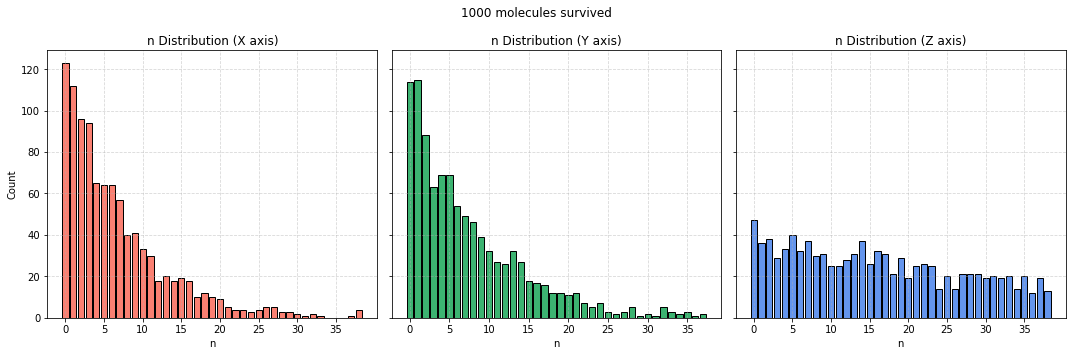

In [27]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_sim.plot_n_distribution(mol_list)

In [28]:
n_bar, num_survive, ground_state_count, sem = RSC_sim.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
sems.append(sem)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses: 100%|██████████| 280/280 [00:24<00:00, 11.32it/s]


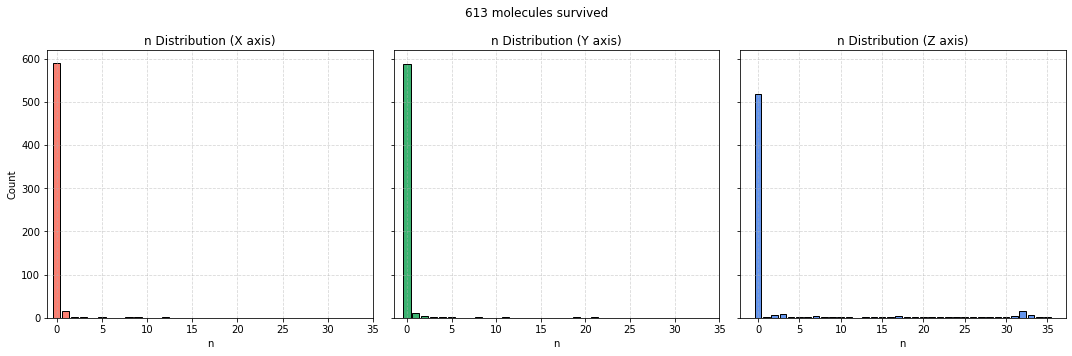

In [29]:
_, _, _ = RSC_sim.plot_n_distribution(mol_list)

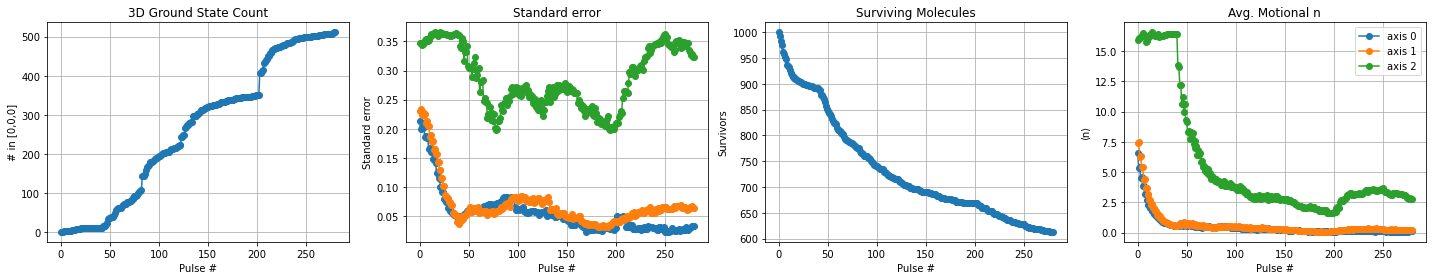

In [30]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, sem)

### Optimize with Genetic Algorithm

In [31]:
sequence = RSC_sim.load_sequence('sequences/best_sequence_1.txt')

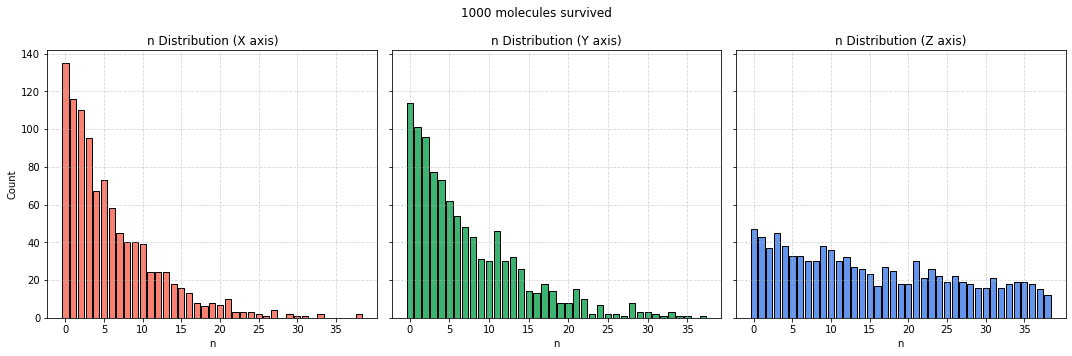

In [32]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_sim.plot_n_distribution(mol_list)

In [33]:
n_bar, num_survive, ground_state_count, sem = RSC_sim.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
sems.append(sem)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses: 100%|██████████| 280/280 [00:23<00:00, 12.04it/s]


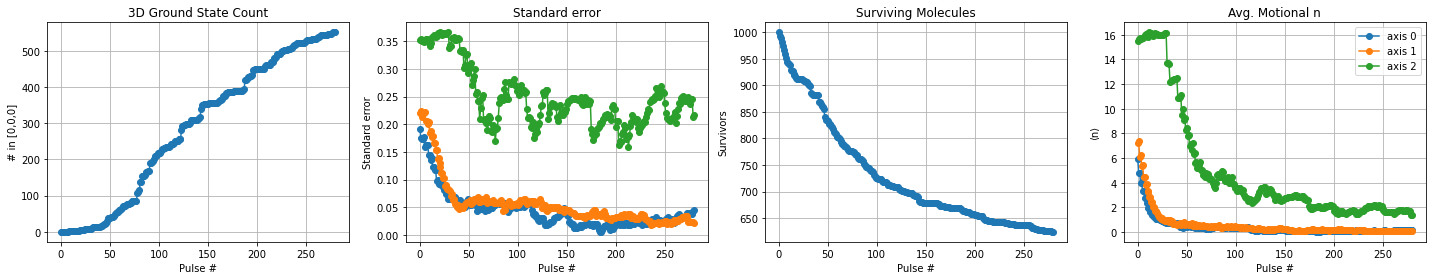

In [34]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, sem)

#### Optimize again

In [35]:
sequence = RSC_sim.load_sequence('sequences/best_sequence_same_length.txt')

In [36]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
n_bar, num_survive, ground_state_count, sem = RSC_sim.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
sems.append(sem)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses: 100%|██████████| 280/280 [00:24<00:00, 11.41it/s]


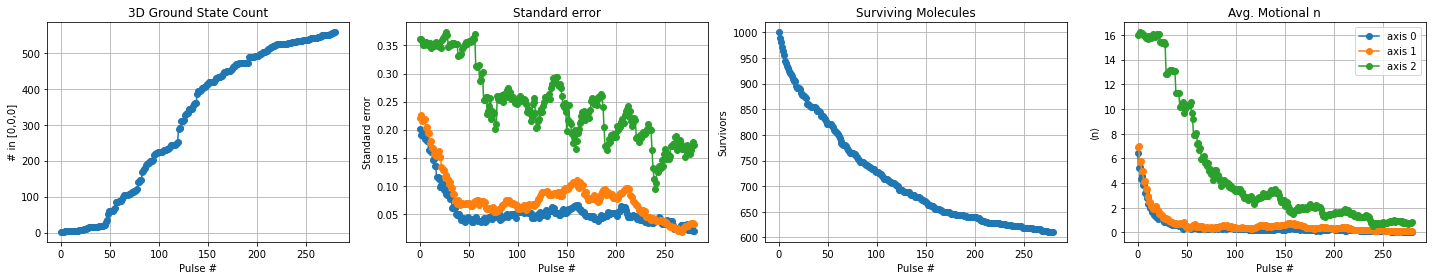

In [37]:
RSC_sim.plot_time_sequence_data(n_bar, num_survive, ground_state_count, sem)

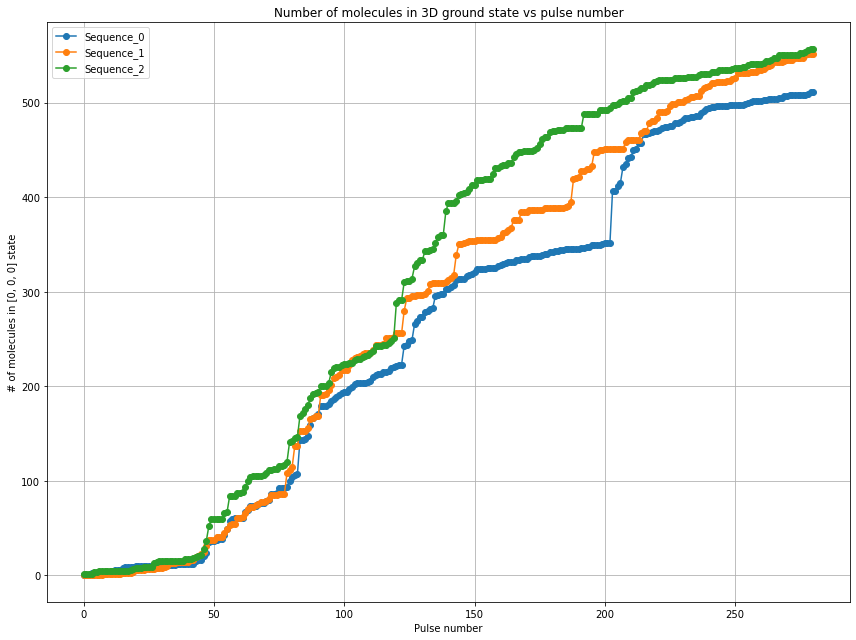

In [38]:
plt.figure(figsize=(12, 9))
for i, count in enumerate(ground_state_counts):
    plt.plot(range(len(count)), count, marker='o', label=f'Sequence_{i}')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Add higher $\Delta n$

In [39]:
loaded_sequence = RSC_sim.load_sequence('sequences/best_sequence_same_length_2025-07-28_11-04-39.txt')

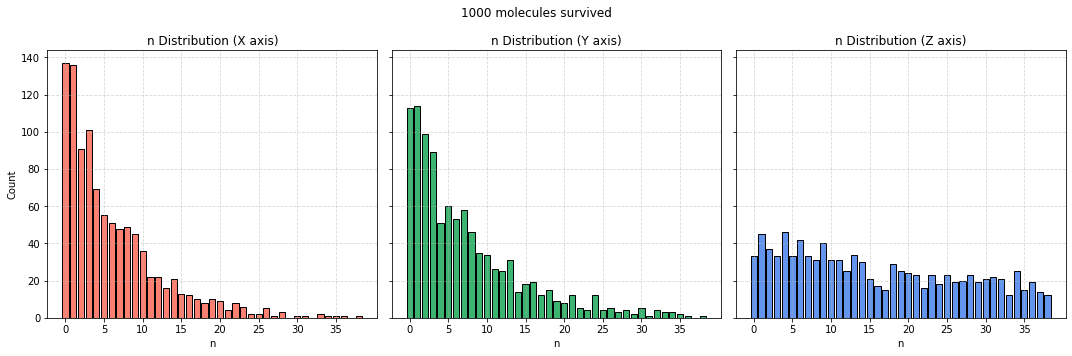

Applying pulses: 100%|██████████| 280/280 [00:28<00:00,  9.90it/s]


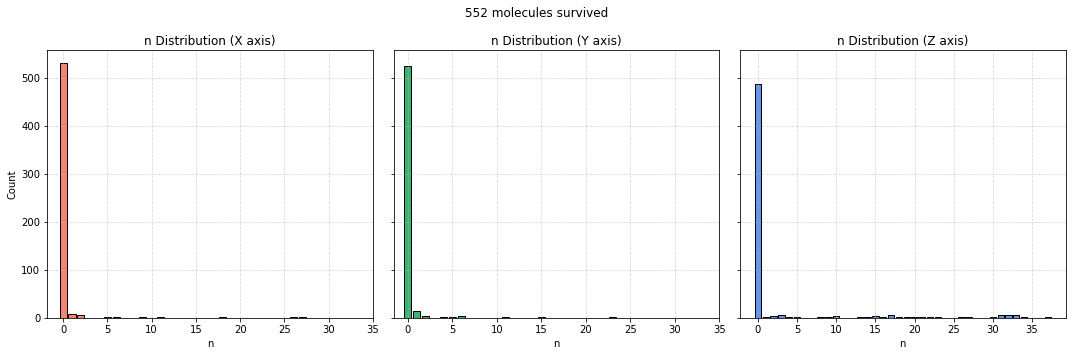

In [40]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_sim.plot_n_distribution(mol_list)
_, _, ground_state_count,_ = RSC_sim.apply_raman_sequence(mol_list, loaded_sequence)
ground_state_counts.append(ground_state_count)
_, _, _ = RSC_sim.plot_n_distribution(mol_list)

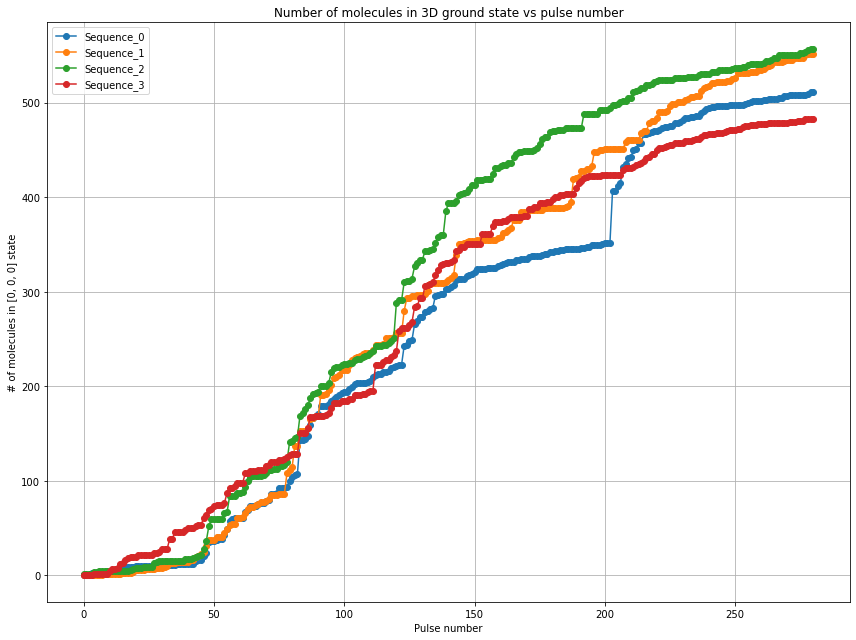

In [41]:
plt.figure(figsize=(12, 9))
for i, count in enumerate(ground_state_counts):
    plt.plot(range(len(count)), count, marker='o', label=f'Sequence_{i}')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Optimization on ground state number, radial $\Delta n$ up to -6 ans axial $\Delta n$ up to -9

In [42]:
loaded_sequence = RSC_sim.load_sequence('sequences/sequence_var_length_2025-08-01_23-44-52.txt')

In [43]:
sequence_ = []
for seq in loaded_sequence:
    sequence_.append([seq[0], seq[1], RSC_sim.pulse_time(seq[0], seq[1])])

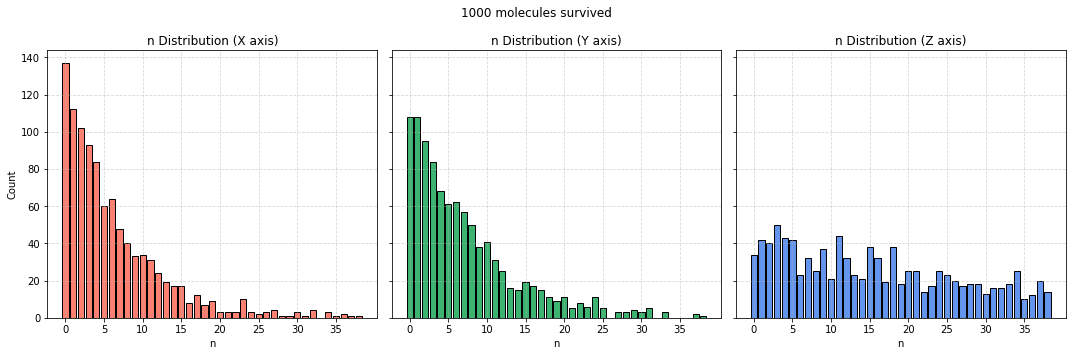

Applying pulses: 100%|██████████| 280/280 [00:27<00:00, 10.11it/s]


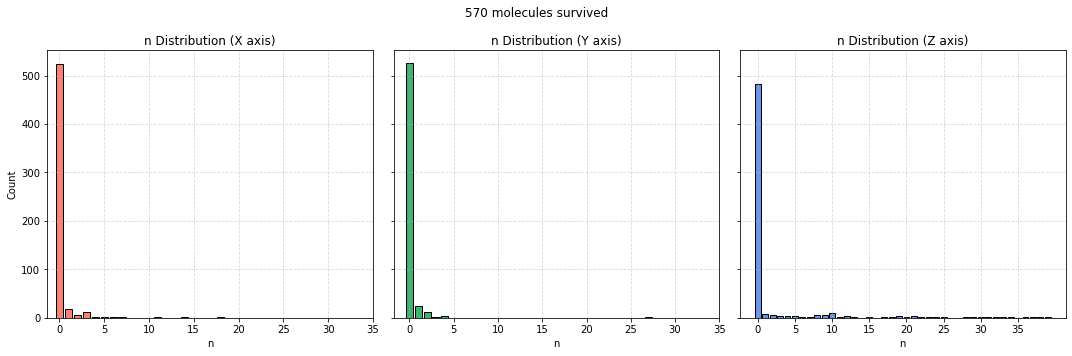

In [44]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_sim.plot_n_distribution(mol_list)
_, _, ground_state_count,_ = RSC_sim.apply_raman_sequence(mol_list, sequence_)
ground_state_counts.append(ground_state_count)
_, _, _ = RSC_sim.plot_n_distribution(mol_list)

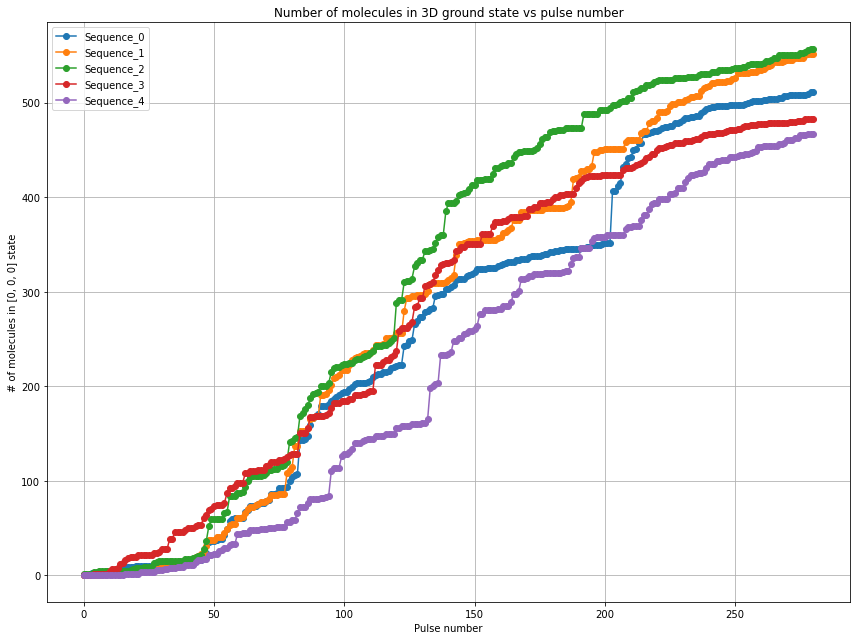

In [45]:
plt.figure(figsize=(12, 9))
for i, count in enumerate(ground_state_counts):
    plt.plot(range(len(count)), count, marker='o', label=f'Sequence_{i}')
plt.title("Number of molecules in 3D ground state vs pulse number")
plt.xlabel("Pulse number")
plt.ylabel("# of molecules in [0, 0, 0] state")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#### Allowing higher $\Delta n$ makes it worse